In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

In [47]:
df_loan = pd.read_csv("./data-set/loan.csv")

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [49]:
#Cleaning up date columns
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].head()


id earliest_cr_line        term issue_d last_credit_pull_d  \
0  1077501           Jan-85   36 months  Dec-11             May-16   
1  1077430           Apr-99   60 months  Dec-11             Sep-13   
2  1077175           Nov-01   36 months  Dec-11             May-16   
3  1076863           Feb-96   36 months  Dec-11             Apr-16   
4  1075358           Jan-96   60 months  Dec-11             May-16   

  last_pymnt_d next_pymnt_d  
0       Jan-15          NaN  
1       Apr-13          NaN  
2       Jun-14          NaN  
3       Jan-15          NaN  
4       May-16       Jun-16

In [50]:
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
id                    39717 non-null int64
earliest_cr_line      39717 non-null object
term                  39717 non-null object
issue_d               39717 non-null object
last_credit_pull_d    39715 non-null object
last_pymnt_d          39646 non-null object
next_pymnt_d          1140 non-null object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [51]:
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'],format='%b-%y')
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'],format='%b-%y')
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'],format='%b-%y')
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'],format='%b-%y')
df_loan['next_pymnt_d'] = pd.to_datetime(df_loan['next_pymnt_d'],format='%b-%y')

In [52]:
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
id                    39717 non-null int64
earliest_cr_line      39717 non-null datetime64[ns]
term                  39717 non-null object
issue_d               39717 non-null datetime64[ns]
last_credit_pull_d    39715 non-null datetime64[ns]
last_pymnt_d          39646 non-null datetime64[ns]
next_pymnt_d          1140 non-null datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(1)
memory usage: 2.1+ MB


In [53]:
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].head()

id earliest_cr_line        term    issue_d last_credit_pull_d  \
0  1077501       1985-01-01   36 months 2011-12-01         2016-05-01   
1  1077430       1999-04-01   60 months 2011-12-01         2013-09-01   
2  1077175       2001-11-01   36 months 2011-12-01         2016-05-01   
3  1076863       1996-02-01   36 months 2011-12-01         2016-04-01   
4  1075358       1996-01-01   60 months 2011-12-01         2016-05-01   

  last_pymnt_d next_pymnt_d  
0   2015-01-01          NaT  
1   2013-04-01          NaT  
2   2014-06-01          NaT  
3   2015-01-01          NaT  
4   2016-05-01   2016-06-01

In [54]:
df_loan.to_csv("./data-set/clean_loan.csv")

In [221]:
df_loan["title"].isnull().sum()

11

In [222]:
df_loan.title.nunique()

19615

In [272]:
df_loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [224]:
df_loan.groupby(['loan_status', 'emp_length', 'purpose']).id.count()

loan_status  emp_length  purpose           
Charged Off  1 year      car                     17
                         credit_card             39
                         debt_consolidation     209
                         educational              5
                         home_improvement        27
                         house                    5
                         major_purchase          20
                         medical                 11
                         moving                  12
                         other                   55
                         renewable_energy         2
                         small_business          51
                         wedding                  3
             10+ years   car                     32
                         credit_card            123
                         debt_consolidation     704
                         educational              4
                         home_improvement       102
                    

In [226]:
df_loan.groupby(["loan_status","delinq_2yrs","verification_status","inq_last_6mths"]).id.count()

loan_status  delinq_2yrs  verification_status  inq_last_6mths
Charged Off  0            Not Verified         0                 756
                                               1                 551
                                               2                 304
                                               3                 218
                                               4                  23
                                               5                  11
                                               6                   5
                                               7                   3
                                               8                   1
                          Source Verified      0                 515
                                               1                 379
                                               2                 230
                                               3                 128
                                         

In [227]:
df_loan.groupby(["loan_status","delinq_2yrs","verification_status","inq_last_6mths"]).agg({'id':['count'], 'funded_amnt':['sum']})

id funded_amnt
                                                           count         sum
loan_status delinq_2yrs verification_status inq_last_6mths                  
Charged Off 0           Not Verified        0                756     6414475
                                            1                551     4668325
                                            2                304     2635850
                                            3                218     1804375
                                            4                 23      249275
                                            5                 11      169850
                                            6                  5       47500
                                            7                  3       35800
                                            8                  1       20000
                        Source Verified     0                515     5425275
                                            1                379     4000875
                                            2                230     2289775
                                            3                128     1259450
                                            4                  7       84000
                                            5                  5       83025
                                            6                  2        9900
                                            7                  4       75000
                        Verified            0                732    11917175
                                            1                537     8838100
                                            2                297     4697350
                                            3                185     2796225
                                            4                 19      377175
                                            5                 12      243100
                                            6                  8      134550
                                            7                  2       27000
                                            8                  2       39000
            1           Not Verified        0                 72      595925
                                            1                 59      453900
                                            2                 33      236300
                                            3                 30      241575
...                                                          ...         ...
Fully Paid  4           Source Verified     0                  7       86725
                                            1                  5       39000
                                            2                  2       18000
                                            3                  3       15500
                        Verified            0                  6       69000
                                            1                  4       47725
                                            2                  2       16000
                                            3                  1        6000
                                            5                  1       12000
            5           Not Verified        0                  6       44500
                                            1                  2        9200
                        Source Verified     0                  1       10000
                                            1                  1        7000
                        Verified            0                  1        1800
                                            1                  3       22050
                                            2                  1        6000
                                            3                  3       43325
            6           Not Verified        0                  3       13000
                                            3             

In [229]:
df_loan.groupby(["loan_status","addr_state","home_ownership"]).agg({"id":["count"], "funded_amnt":["sum"]})

id funded_amnt
                                      count         sum
loan_status addr_state home_ownership                  
Charged Off AK         MORTGAGE           9      131825
                       OWN                1       20000
                       RENT               5       50050
            AL         MORTGAGE          28      416300
                       OWN               10      102400
                       RENT              16      171775
            AR         MORTGAGE          11      124025
                       OTHER              1        9375
                       OWN                3       36150
                       RENT              12       85850
            AZ         MORTGAGE          59      786175
                       OTHER              2       35000
                       OWN                6       71250
                       RENT              56      527325
            CA         MORTGAGE         325     4496150
                       OTHER              4       52150
                       OWN               72      879100
                       RENT             724     7926325
            CO         MORTGAGE          46      676800
                       OTHER              2       16675
                       OWN                4       33375
                       RENT              46      482200
            CT         MORTGAGE          44      523075
                       OWN                8       65325
                       RENT              42      436250
            DC         MORTGAGE           1        7500
                       RENT              14      197000
            DE         MORTGAGE           8      110700
                       RENT               4       23200
            FL         MORTGAGE         224     3110275
...                                     ...         ...
Fully Paid  TN         RENT               7       37700
            TX         MORTGAGE        1277    16014900
                       OTHER              5       20075
                       OWN              218     1962900
                       RENT             843     7919050
            UT         MORTGAGE         135     1451150
                       OWN                4       49400
                       RENT              73      649975
            VA         MORTGAGE         560     6702275
                       NONE               1       10000
                       OTHER              5       66500
                       OWN               77      786025
                       RENT             549     5447000
            VT         MORTGAGE          21      220475
                       OTHER              2       26000
                       OWN                2       15000
                       RENT              22      153225
            WA         MORTGAGE         298     3491050
                       OWN               30      274175
                       RENT             363     3282600
            WI         MORTGAGE         192     2242750
                       OTHER              1        1200
                       OWN               19      177300
                       RENT             165     1547175
            WV         MORTGAGE          88     1031850
                       OWN               17      170225
                       RENT              46      345275
            WY         MORTGAGE          44      493200
                       OWN                7       87000
                       RENT              25      190900

[429 rows x 2 columns]

In [242]:
df1 = df_loan[['installment', 'emp_title', 'emp_length', 'url', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'revol_bal', 'initial_list_status', 'total_rec_prncp', 'total_rec_late_fee', 'policy_code', 'funded_amnt', 'term', 'verification_status', 'loan_status', 'desc', 'zip_code', 'mths_since_last_record', 'open_acc', 'out_prncp_inv', 'total_pymnt', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'application_type', 'id', 'int_rate', 'sub_grade', 'purpose', 'pub_rec', 'revol_util', 'total_rec_int', 'recoveries', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'annual_inc', 'issue_d', 'pymnt_plan', 'addr_state', 'mths_since_last_delinq', 'total_acc', 'out_prncp', 'total_pymnt_inv']]

In [243]:
df1.head()

installment                 emp_title emp_length  \
0       162.87                       NaN  10+ years   
1        59.83                     Ryder   < 1 year   
2        84.33                       NaN  10+ years   
3       339.31       AIR RESOURCES BOARD  10+ years   
4        67.79  University Medical Group     1 year   

                                                 url                 title  \
0  https://lendingclub.com/browse/loanDetail.acti...              Computer   
1  https://lendingclub.com/browse/loanDetail.acti...                  bike   
2  https://lendingclub.com/browse/loanDetail.acti...  real estate business   
3  https://lendingclub.com/browse/loanDetail.acti...              personel   
4  https://lendingclub.com/browse/loanDetail.acti...              Personal   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  revol_bal  \
0  27.65            0           Jan-85               1      13648   
1   1.00            0           Apr-99               5       1687   
2   8.72            0           Nov-01               2       2956   
3  20.00            0           Feb-96               1       5598   
4  17.94            0           Jan-96               0      27783   

        ...       grade  home_ownership  annual_inc  issue_d  pymnt_plan  \
0       ...           B            RENT     24000.0   Dec-11           n   
1       ...           C            RENT     30000.0   Dec-11           n   
2       ...           C            RENT     12252.0   Dec-11           n   
3       ...           C            RENT     49200.0   Dec-11           n   
4       ...           B            RENT     80000.0   Dec-11           n   

  addr_state mths_since_last_delinq total_acc out_prncp total_pymnt_inv  
0         AZ                    NaN         9      0.00         5833.84  
1         GA                    NaN         4      0.00         1008.71  
2         IL                    NaN        10      0.00         3005.67  
3         CA                   35.0        37      0.00        12231.89  
4         OR                   38.0        38    524.06         3513.33  

[5 rows x 53 columns]

In [246]:
df_fully_paid = df1[df1.loan_status == "Fully Paid"]
df_Charged_off = df1[df1.loan_status == "Charged Off"]
df_Current = df1[df1.loan_status == "Current"]

In [251]:
df_fully_paid.shape -- (32950, 53)
df_Charged_off.shape -- (5627, 53)
df_Current.shape -- (1140, 53)

(5627, 53)

In [255]:
df2 =  df_Charged_off.corr(method = "pearson")

In [256]:
df2

installment       dti  delinq_2yrs  \
installment                     1.000000  0.042358    -0.012530   
dti                             0.042358  1.000000    -0.068839   
delinq_2yrs                    -0.012530 -0.068839     1.000000   
inq_last_6mths                  0.018359 -0.028810    -0.011454   
revol_bal                       0.299930  0.239712    -0.081994   
total_rec_prncp                 0.577424  0.014944    -0.034993   
total_rec_late_fee              0.119871 -0.037967     0.029122   
policy_code                          NaN       NaN          NaN   
funded_amnt                     0.953826  0.060861    -0.027366   
mths_since_last_record         -0.149253  0.179213    -0.077147   
open_acc                        0.179676  0.299230    -0.018495   
out_prncp_inv                        NaN       NaN          NaN   
total_pymnt                     0.666864  0.043360    -0.016056   
collection_recovery_fee         0.185040  0.006795     0.024517   
last_pymnt_amnt                 0.350428  0.000367    -0.000316   
mths_since_last_major_derog          NaN       NaN          NaN   
id                              0.083107  0.111235     0.002086   
pub_rec                        -0.041068  0.007990    -0.001608   
total_rec_int                   0.628887  0.068741     0.002871   
recoveries                      0.300368  0.030623     0.014393   
collections_12_mths_ex_med           NaN       NaN          NaN   
member_id                       0.071906  0.111183     0.002918   
loan_amnt                       0.925911  0.063872    -0.029843   
funded_amnt_inv                 0.858041  0.072924    -0.031524   
annual_inc                      0.358656 -0.089725     0.021765   
mths_since_last_delinq         -0.008375  0.075373    -0.583190   
total_acc                       0.251874  0.272802     0.059658   
out_prncp                            NaN       NaN          NaN   
total_pymnt_inv                 0.616589  0.049070    -0.022492   

                             inq_last_6mths  revol_bal  total_rec_prncp  \
installment                        0.018359   0.299930         0.577424   
dti                               -0.028810   0.239712         0.014944   
delinq_2yrs                       -0.011454  -0.081994        -0.034993   
inq_last_6mths                     1.000000  -0.010770        -0.053692   
revol_bal                         -0.010770   1.000000         0.188357   
total_rec_prncp                   -0.053692   0.188357         1.000000   
total_rec_late_fee                 0.017908   0.029719         0.150594   
policy_code                             NaN        NaN              NaN   
funded_amnt                        0.007942   0.296956         0.569719   
mths_since_last_record            -0.095351  -0.062853        -0.178472   
open_acc                           0.078767   0.330555         0.104110   
out_prncp_inv                           NaN        NaN              NaN   
total_pymnt                       -0.045202   0.227425         0.914954   
collection_recovery_fee           -0.005814   0.061735         0.049254   
last_pymnt_amnt                    0.009718   0.124082         0.276025   
mths_since_last_major_derog             NaN        NaN              NaN   
id                                -0.062355  -0.017684         0.054958   
pub_rec                            0.013126  -0.063607        -0.034061   
total_rec_int                     -0.024286   0.215186         0.752971   
recoveries                        -0.014236   0.121192         0.096637   
collections_12_mths_ex_med              NaN        NaN              NaN   
member_id                         -0.065406  -0.024654         0.052423   
loan_amnt                          0.007480   0.313101         0.551302   
funded_amnt_inv                   -0.018395   0.254045         0.550112   
annual_inc                         0.037303   0.379449         0.239091   
mths_since_last_delinq            -0.009707   0.036434         0.043

In [7]:
df_3 = pd.read_csv("C:\\Users\\I324893\\Documents\\GitHub\\data-analysis\\case-study-2\\data-set\\loan.csv")
df3 = df_3[['installment', 'emp_title', 'emp_length', 'url', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'revol_bal', 'initial_list_status', 'total_rec_prncp', 'total_rec_late_fee', 'policy_code', 'funded_amnt', 'term', 'verification_status', 'loan_status', 'desc', 'zip_code', 'mths_since_last_record', 'open_acc', 'out_prncp_inv', 'total_pymnt', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'application_type', 'id', 'int_rate', 'sub_grade', 'purpose', 'pub_rec', 'revol_util', 'total_rec_int', 'recoveries', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'annual_inc', 'issue_d', 'pymnt_plan', 'addr_state', 'mths_since_last_delinq', 'total_acc', 'out_prncp', 'total_pymnt_inv']]

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df3["emp_length"] = np.where(df3["emp_length"] == "< 1 year", 0, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "1 year", 1, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "2 years", 2, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "3 years", 3, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "4 years", 4, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "5 years", 5, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "6 years", 6, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "7 years", 7, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "8 years", 8, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "9 years", 9, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "10+ years", 10, df3["emp_length"])

df3["loan_status"] = np.where(df3["loan_status"] == "Fully Paid", 1, df3["loan_status"])
df3["loan_status"] = np.where(df3["loan_status"] == "Current", 2, df3["loan_status"])
df3["loan_status"] = np.where(df3["loan_status"] == "Charged Off", 3, df3["loan_status"])

df3["purpose"] = np.where(df3["purpose"] == "debt_consolidation", 1, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "credit_card", 2, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "other", 3, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "home_improvement", 4, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "major_purchase", 5, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "small_business", 6, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "car", 7, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "wedding", 8, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "medical", 9, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "moving", 10, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "house", 11, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "vacation", 12, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "educational", 13, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "renewable_energy", 14, df3["purpose"])

df3["grade"] = np.where(df3["grade"] == "A", 1, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "B", 2, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "C", 3, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "D", 4, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "E", 5, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "F", 6, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "G", 7, df3["grade"])

df3["verification_status"] = np.where(df3["verification_status"] == "Not Verified", 1, df3["verification_status"])
df3["verification_status"] = np.where(df3["verification_status"] == "Verified", 2, df3["verification_status"])
df3["verification_status"] = np.where(df3["verification_status"] == "Source Verified", 3, df3["verification_status"])

df3["home_ownership"] = np.where(df3["home_ownership"] == "RENT", 1, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "MORTGAGE", 2, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "OWN", 3, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "OTHER", 4, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "NONE", 5, df3["home_ownership"])

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [9]:
df3.purpose.value_counts()

1     18641
2      5130
3      3993
4      2976
5      2187
6      1828
7      1549
8       947
9       693
10      583
12      381
11      381
13      325
14      103
Name: purpose, dtype: int64

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


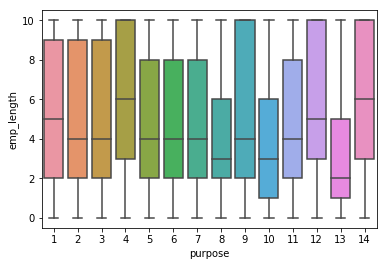

In [10]:
df3['emp_length'] = df3['emp_length'].astype(float)
sns.boxplot(x = "purpose", y = "emp_length", data=df3)
plt.show()

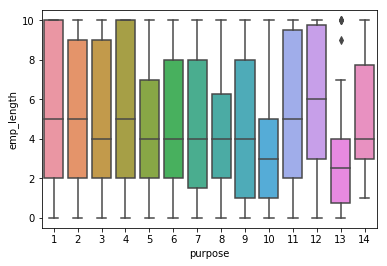

In [11]:
df3_Charged_off = df3[df3.loan_status == 3]
sns.boxplot(x = "purpose", y = "emp_length", data=df3_Charged_off)
plt.show()

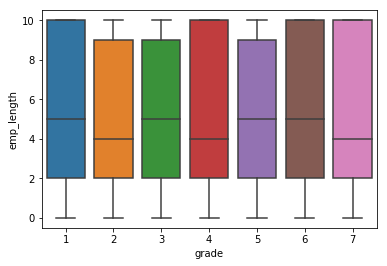

In [12]:
sns.boxplot(x = "grade", y = "emp_length", data=df3_Charged_off)
plt.show()

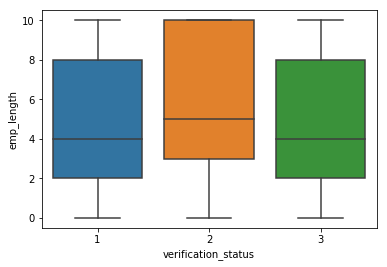

In [13]:
sns.boxplot(x = "verification_status", y = "emp_length", data=df3_Charged_off)
plt.show()

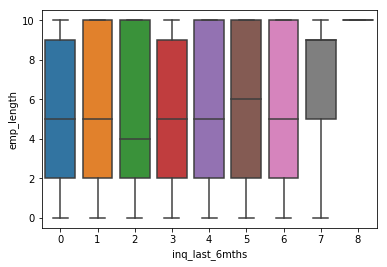

In [14]:
sns.boxplot(x = "inq_last_6mths", y = "emp_length", data=df3_Charged_off)
plt.show()

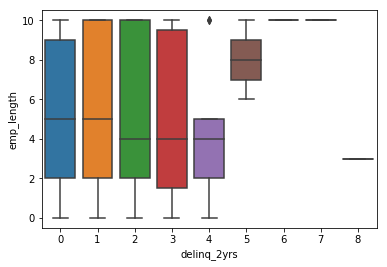

In [15]:
sns.boxplot(x = "delinq_2yrs", y = "emp_length", data=df3_Charged_off)
plt.show()

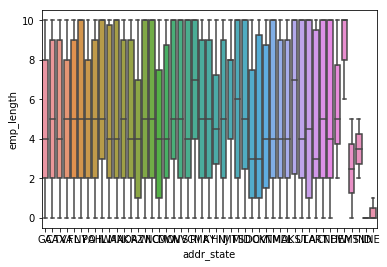

In [312]:
sns.boxplot(x = "addr_state", y = "emp_length", data=df3_Charged_off)
plt.show()

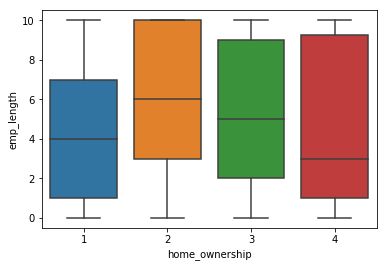

In [313]:
sns.boxplot(x = "home_ownership", y = "emp_length", data=df3_Charged_off)
plt.show()

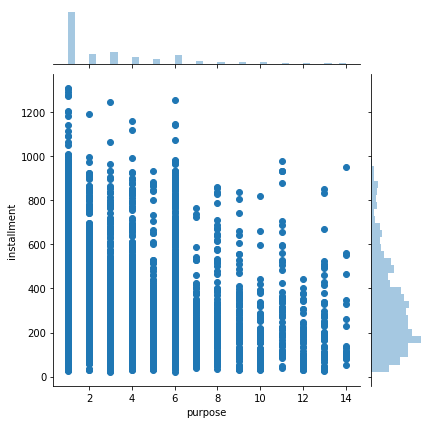

In [333]:
df3_Charged_off['purpose'] = df3_Charged_off['purpose'].astype(float)
sns.jointplot(x = "purpose", y ="installment" , data=df3_Charged_off)
plt.show()

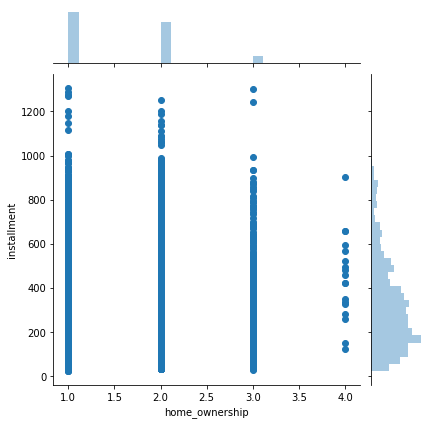

In [334]:
df3_Charged_off['home_ownership'] = df3_Charged_off['home_ownership'].astype(float)
sns.jointplot(x = "home_ownership", y ="installment" , data=df3_Charged_off)
plt.show()

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


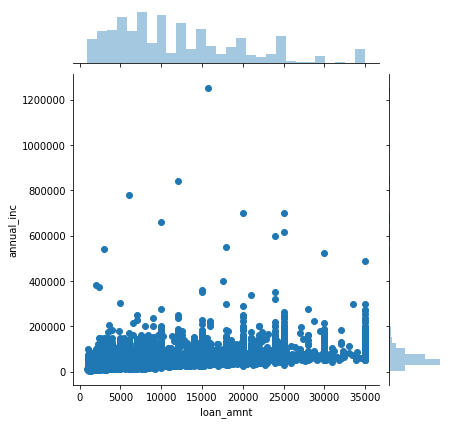

In [16]:
sns.jointplot(x = "loan_amnt", y ="annual_inc" , data=df3_Charged_off)
plt.show()

C:\Users\I324893\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


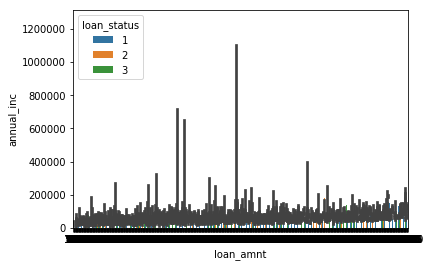

In [18]:
sns.barplot(x = "loan_amnt", y ="annual_inc" , hue="loan_status",data=df3)
plt.show()

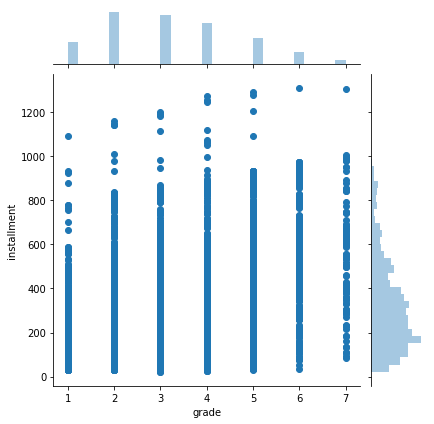

In [335]:
df3_Charged_off['grade'] = df3_Charged_off['grade'].astype(float)
sns.jointplot(x = "grade", y ="installment" , data=df3_Charged_off)
plt.show()

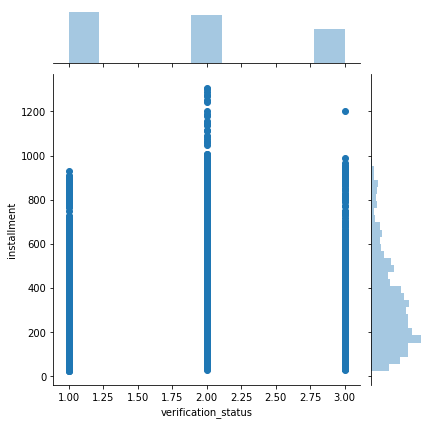

In [336]:
df3_Charged_off['verification_status'] = df3_Charged_off['verification_status'].astype(float)
sns.jointplot(x = "verification_status", y ="installment" , data=df3_Charged_off)
plt.show()

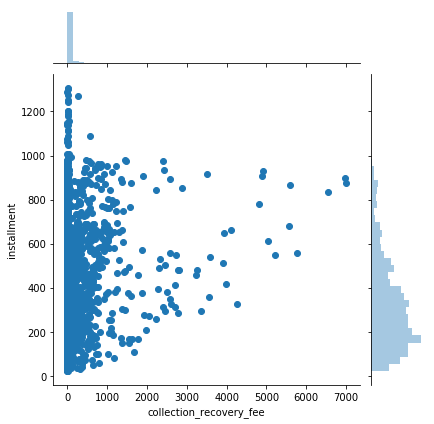

In [337]:
sns.jointplot(x = "collection_recovery_fee", y ="installment" , data=df3_Charged_off)
plt.show()

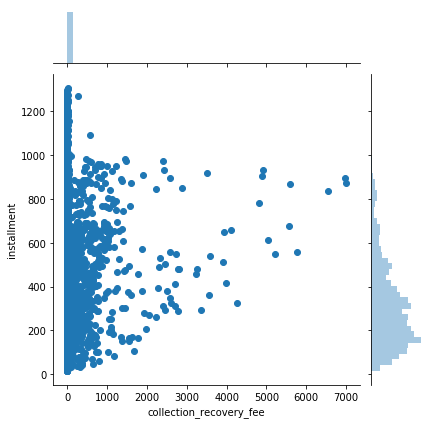

In [350]:
sns.jointplot(x = "collection_recovery_fee", y ="installment" , data=df3)
plt.show()

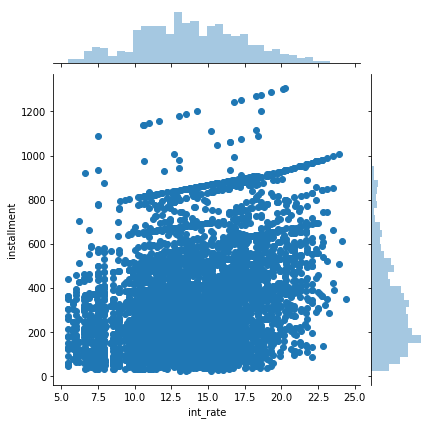

In [347]:
#df3_Charged_off.int_rate.value_counts()
df3_Charged_off['int_rate'] = df3_Charged_off['int_rate'].str.strip("%").astype(float)
sns.jointplot(x = "int_rate", y ="installment" , data=df3_Charged_off)
plt.show()

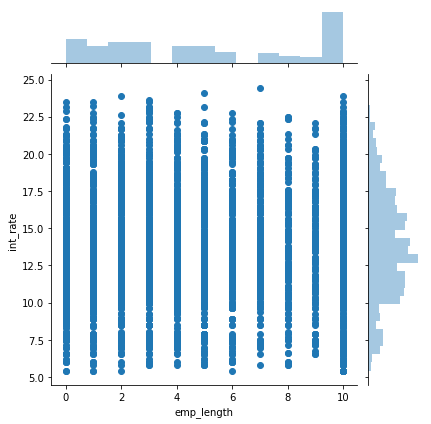

In [349]:
sns.jointplot(x = "emp_length", y ="int_rate" , data=df3_Charged_off)
plt.show()

In [351]:
df4 = df3[['loan_status', 'emp_length', 'purpose', 'grade', 'delinq_2yrs', 'verification_status', 'inq_last_6mths', 'home_ownership']]
df4_charged_off = df4[df4.loan_status == 3]
df4_charged_off['loan_status'] = df4_charged_off['loan_status'].astype(float)
df4_charged_off['emp_length'] = df4_charged_off['emp_length'].astype(float)
df4_charged_off['purpose'] = df4_charged_off['purpose'].astype(float)
df4_charged_off['grade'] = df4_charged_off['grade'].astype(float)
df4_charged_off['delinq_2yrs'] = df4_charged_off['delinq_2yrs'].astype(float)
df4_charged_off['verification_status'] = df4_charged_off['verification_status'].astype(float)
df4_charged_off['inq_last_6mths'] = df4_charged_off['inq_last_6mths'].astype(float)
df4_charged_off['home_ownership'] = df4_charged_off['home_ownership'].astype(float)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [352]:
df4_charged_off_corr = df4_charged_off.corr(method = "pearson")

In [353]:
df4_charged_off_corr

loan_status  emp_length   purpose     grade  delinq_2yrs  \
loan_status                  NaN         NaN       NaN       NaN          NaN   
emp_length                   NaN    1.000000 -0.073288  0.027658     0.013176   
purpose                      NaN   -0.073288  1.000000 -0.086749     0.055901   
grade                        NaN    0.027658 -0.086749  1.000000     0.133869   
delinq_2yrs                  NaN    0.013176  0.055901  0.133869     1.000000   
verification_status          NaN    0.019142 -0.025289  0.146211    -0.012328   
inq_last_6mths               NaN    0.008314  0.059981  0.046872    -0.011454   
home_ownership               NaN    0.163747 -0.018415 -0.009602     0.035175   

                     verification_status  inq_last_6mths  home_ownership  
loan_status                          NaN             NaN             NaN  
emp_length                      0.019142        0.008314        0.163747  
purpose                        -0.025289        0.059981       -0.018415  
grade                           0.146211        0.046872       -0.009602  
delinq_2yrs                    -0.012328       -0.011454        0.035175  
verification_status             1.000000       -0.016600       -0.035853  
inq_last_6mths                 -0.016600        1.000000        0.063705  
home_ownership                 -0.035853        0.063705        1.000000

In [354]:
df4_charged_off.head()

loan_status  emp_length  purpose  grade  delinq_2yrs  verification_status  \
1           3.0         0.0      7.0    3.0          0.0                  3.0   
8           3.0         4.0      6.0    6.0          0.0                  3.0   
9           3.0         0.0      3.0    2.0          0.0                  2.0   
12          3.0         0.0      1.0    3.0          0.0                  3.0   
14          3.0         3.0      3.0    2.0          0.0                  3.0   

    inq_last_6mths  home_ownership  
1              5.0             1.0  
8              2.0             3.0  
9              0.0             1.0  
12             1.0             1.0  
14             2.0             1.0